Loading data

In [1]:
import pandas as pd

In [2]:
#loading file function
def load_csv(path):
    df = pd.read_csv(path,engine='python',error_bad_lines=False, na_values=['?', None,'-','--','undefined'])
    return df

In [3]:
#loaded file
df= load_csv('../data/data.csv')

In [4]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [10]:
# function for fill missing values
def fill_missing_values(df):
    """ This function fill the missing values 
        of columns with object datatype using 
        mode and columns with numeric datatypes
        with median"""
    objectTypeCols = [col_name for col_name in df.columns.tolist() if df.dtypes[col_name] == object]
    numericTypeCols = [col_name for col_name in df.columns.tolist() if col_name not in objectTypeCols]
    print(objectTypeCols)

    #for object type columns use mode
    for col in objectTypeCols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    #for numeric type columsn use median
    for col in numericTypeCols:
        df[col] = df[col].fillna(df[col].median())
    return df
    


In [11]:
def Handle_missing_values(df):
        """ This function handles missing values
            by removing columns with more than 30%
            null values and filling others"""

        # removed columns containing null values of more than 30%
        row,col = df.shape
        df.dropna(axis='columns',thresh=row*0.7,inplace=True)
        # for columns still with missing values fill appropriately
        df = fill_missing_values(df)
        return df

In [12]:
cleaned_data = Handle_missing_values(df)

['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


after loading and cleaning the data now we will do our eda on User engagement, to understand how well the users engage on the available applications. We need to determine the level of engagement of a random user for any application. To do that we will focus on the following "sessions frequency", "the duration of the session" and "the sessions total traffic (download and upload (bytes))". We will do analysis on these variables, normalize them and then cluster users using these metrics, so it will be easier to provide a more customized service for each user.


First step is Doing EDA on the variables

Utility functions

In [91]:
def convert_bytes_to_megabytes(df,col):
    """ This function converts bytes to Megabytes"""
    megabyte = 1*10e+5
    df[col+"in MB"] = df[col] / megabyte
    
    return df[col+"in MB"]

def convert_ms_to_hrs(df,col_name):
    """ This function converts millisecond to hours"""
    hr = 3600000
    df[col_name+" in hrs"] = df[col_name] / hr
    
    return df[col_name+" in hrs"]


In [83]:
# print out unique session counts per person
# unique_sessions = {"unique_session_counts":cleaned_data.groupby("MSISDN/Number").nunique(), "Out of": cleaned_data["Bearer Id"].count()}

# groups users based on their MSIDN number and count how many sessions they created
cleaned_copy = cleaned_data.copy()
cleaned_copy['total data(bytes)'] = cleaned_copy['Total UL (Bytes)'] + cleaned_copy ['Total DL (Bytes)']
df_user = cleaned_copy.groupby("MSISDN/Number")

# print(unique_sessions)
df_session_freq = df_user["Bearer Id"].count()
df_session_dur = df_user["Dur. (ms)"].sum()
df_session_data = df_user["total data(bytes)"].sum()

print("Top 10 users with high session frequency")
df_session_freq.sort_values(ascending=False).head(10)

Top 10 users with high session frequency


MSISDN/Number
3.366371e+10    1067
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.362708e+10      12
3.360452e+10      12
Name: Bearer Id, dtype: int64

In [77]:
# duration of sessions per user
print("Top 10 users with high session duration")
df_session_dur.sort_values(ascending=False).head(10)

Top 10 users with high session duration


MSISDN/Number
3.366371e+10    72655568.0
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
Name: Dur. (ms), dtype: float64

In [78]:
# total data volume per user
print("Top 10 users with high data volume")
df_session_data.sort_values(ascending=False).head(10)

Top 10 users with high data volume


MSISDN/Number
3.366371e+10    5.319636e+11
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
Name: total data(bytes), dtype: float64

In [85]:
df_user_engagment = pd.DataFrame({"session_freq": df_session_freq,"session_duration":df_session_dur,"session_data": df_session_data})
df_user_engagment.head(10)

session_freq  session_duration  session_data
MSISDN/Number                                              
3.360100e+10              1          116720.0  8.786906e+08
3.360100e+10              1          181230.0  1.568596e+08
3.360100e+10              1          134969.0  5.959665e+08
3.360101e+10              1           49878.0  4.223207e+08
3.360101e+10              2           37104.0  1.457411e+09
3.360101e+10              2          253983.0  6.152172e+08
3.360101e+10              2          128360.0  6.547231e+08
3.360101e+10              1           86399.0  3.326604e+08
3.360101e+10              2          495702.0  9.901322e+08
3.360102e+10              1          124854.0  7.324638e+08

Now we have got some intuition about our data regarding user engagement lets normalize and cluster them.


In [89]:
import seaborn as sn
import matplotlib.pyplot as plt

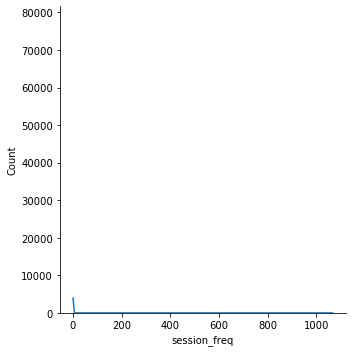

In [98]:
#Before normalizing lets visualize our data
sn.displot(data=df_user_engagment,  kde=True)

In [74]:
from sklearn.preprocessing import Normalizer

In [ ]:
norm = Normalizer()
normalized_data = norm.fit_transform(df)

Running a k-means (k=3) to classify customers in three groups of engagement.